# Chapter 7 - Scientific Programming

In [1]:
using LinearAlgebra

In [2]:
A = [1 -2  2; 1 -1  2; -1  1  1];
det(A)

3.0

In [3]:
b = [5, 7, 5];
v = A\b

3-element Vector{Float64}:
 1.0
 2.0
 4.0

In [4]:
transpose(v)

1×3 transpose(::Vector{Float64}) with eltype Float64:
 1.0  2.0  4.0

In [5]:
A1 = A[:, 2:3] 

3×2 Matrix{Int64}:
 -2  2
 -1  2
  1  1

In [6]:
(A1\b)' 

1×2 adjoint(::Vector{Float64}) with eltype Float64:
 1.27586  3.93103

In [7]:
A2 = A[1:2,:]; b2 = b[1:2];
(A2\b2)'

1×3 adjoint(::Vector{Float64}) with eltype Float64:
 1.8  2.0  3.6

### LU decomposition

In [8]:
Alu = lu(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
  1.0   0.0  0.0
  1.0   1.0  0.0
 -1.0  -1.0  1.0
U factor:
3×3 Matrix{Float64}:
 1.0  -2.0  2.0
 0.0   1.0  0.0
 0.0   0.0  3.0

In [9]:
Alu.U # similar for the lower, i.e. Alu.L

3×3 Matrix{Float64}:
 1.0  -2.0  2.0
 0.0   1.0  0.0
 0.0   0.0  3.0

In [10]:
Alu.L*Alu.U  # => A (original matrix)

3×3 Matrix{Float64}:
  1.0  -2.0  2.0
  1.0  -1.0  2.0
 -1.0   1.0  1.0

In [11]:
Alu.P

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [12]:
#=
Suppose we have equations:

 x - 2y + 2z = 5
 x -  y + 2z = 3
-x +  y + z  = 6

=#

b = [5; 3; 6];

# Ax = b => LUx = b :  x = inv(U)*inv(L)*b

(x,y,z) = inv(Alu.U)*inv(Alu.L)*b

3-element Vector{Float64}:
 -5.0
 -2.0
  3.0

In [13]:
# Compute the eigenvalues of A
# (These are complex numbers)
U = eigvals(A)

3-element Vector{ComplexF64}:
 -0.2873715369435107 - 1.3499963980036567im
 -0.2873715369435107 + 1.3499963980036567im
  1.5747430738870216 + 0.0im

In [14]:
# ... and the eigenvectors
V = eigvecs(A)

3×3 Matrix{ComplexF64}:
 -0.783249-0.0im       -0.783249+0.0im       0.237883+0.0im
 -0.493483-0.303862im  -0.493483+0.303862im  0.651777+0.0im
 0.0106833+0.22483im   0.0106833-0.22483im   0.720138+0.0im

In [15]:
#=
The eigenvectors are the columns of the V matrix.
=#

A*V[:,1] - U[1]*V[:,1]

#=
That is, all the real and imaginary parts are of the e-16 order, 
so this is in effect a zero matrix of complex numbers.
=#

3-element Vector{ComplexF64}:
   2.220446049250313e-16 + 2.220446049250313e-16im
 -1.1102230246251565e-16 + 0.0im
 -2.7755575615628914e-16 - 1.3877787807814457e-16im

### Special matrices

In [16]:
A = [1 -2  2; 1 -1  2; -1  1  1];
Diagonal(diag(A))

3×3 Diagonal{Int64, Vector{Int64}}:
 1   ⋅  ⋅
 ⋅  -1  ⋅
 ⋅   ⋅  1

In [17]:
diag(A)

3-element Vector{Int64}:
  1
 -1
  1

In [18]:
n = 2000;
B = randn(n,n);
B1 = B + B';
B2 = copy(B1);
B2[1,2] += 1eps();
B2[2,1] += 2eps();

In [19]:
issymmetric(B1)'

true

In [20]:
issymmetric(B2)'

false

In [21]:
@time eigvals(B1);

  0.394705 seconds (3.33 k allocations: 31.451 MiB, 2.56% gc time, 2.34% compilation time)


In [22]:
@time eigvals(B2);

  2.366990 seconds (14 allocations: 31.114 MiB)


In [23]:
@time eigvals(Symmetric(B2));

  0.488502 seconds (69.70 k allocations: 35.985 MiB, 2.05% gc time, 15.12% compilation time)


---

In [24]:
# Signal Processing
using PyPlot

In [2]:
fq = 500.0;
N = 512;
T = 6 / fq;
t = collect(range(0, stop=T, length=N));

x1 = sin.(2π * fq * t);
x2 = cos.(8π * fq * t);
x3 = cos.(16π * fq * t);
x = x1 + 0.4*x2 + 0.2*x3;

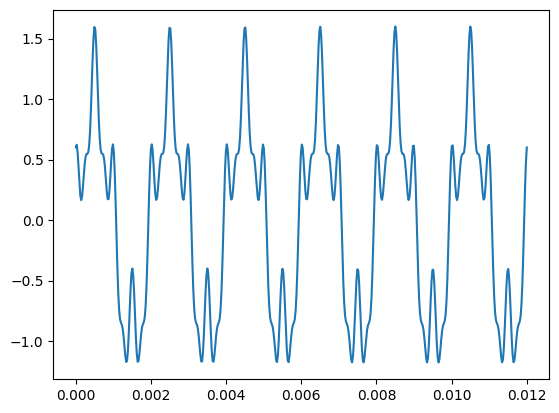

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x15eecc5d0>

In [26]:
PyPlot.plot(t,x)

In [3]:
## using Pkg; Pkg.add("FFTW")
using FFTW

In [4]:
X = rfft(x)
sr = N / T

42666.666666666664

In [5]:
fd = collect(range(0, stop = sr/2, length = div(N,2) + 1))
yy = abs.(X);

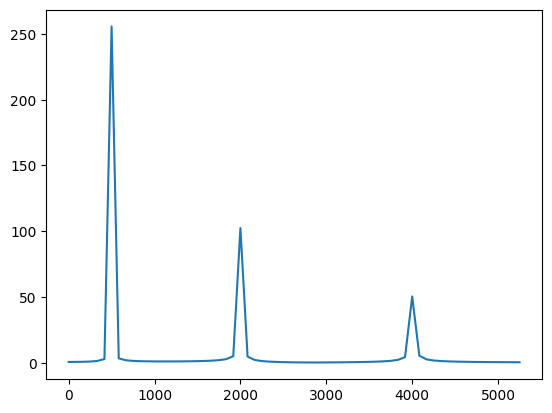

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x167399d90>

In [30]:
PyPlot.plot(fd[1:64], yy[1:64])

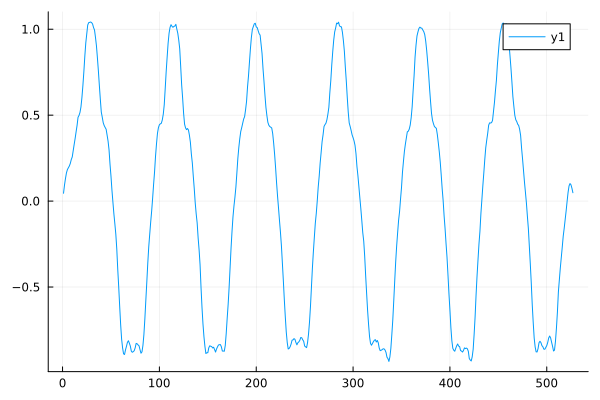

In [8]:
using DSP, Plots

ns = 0.1*randn(length(x));
xn = x + ns;
M = 16;
xm = ones(Float64, M) / M;
xf = conv(xn, xm)
Plots.plot(1:length(xf), xf)

In [9]:
responsetype = Lowpass(0.2)

Lowpass{Float64}(0.2)

In [10]:
prototype = Elliptic(4, 0.5, 30)

ZeroPoleGain{:s, ComplexF64, ComplexF64, Float64}(ComplexF64[0.0 - 1.3958646433922632im, 0.0 + 1.3958646433922632im, 0.0 - 2.9264056331673505im, 0.0 + 2.9264056331673505im], ComplexF64[-0.10991001975723876 - 1.0226440634591358im, -0.10991001975723876 + 1.0226440634591358im, -0.47303953053033576 - 0.5518877317985952im, -0.47303953053033576 + 0.5518877317985952im], 0.0316227766016892)

In [11]:
tf = convert(PolynomialRatio,digitalfilter(responsetype, prototype))

PolynomialRatio{:z, Float64}(Polynomials.LaurentPolynomial(0.04501476861338305*z⁻⁴ - 0.06384392547034845*z⁻³ + 0.09600320644651258*z⁻² - 0.06384392547034845*z⁻¹ + 0.04501476861338305), Polynomials.LaurentPolynomial(0.4827102856365605*z⁻⁴ - 2.0424679546381603*z⁻³ + 3.5085488762611963*z⁻² - 2.8869891622875397*z⁻¹ + 1.0))

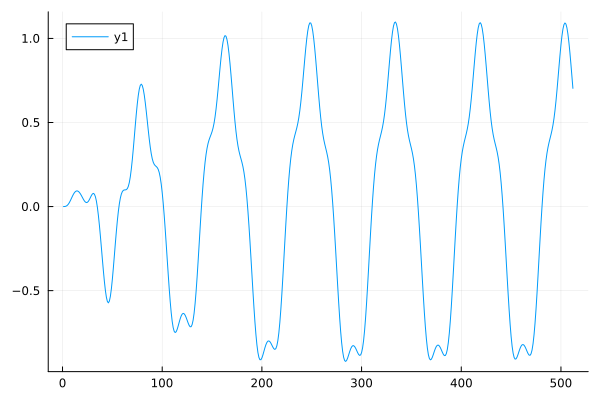

In [13]:
numerator_coefs   = coefb(tf)
denominator_coefs = coefa(tf)

responsetype = Bandpass(10, 40; fs=1000)
prototype = Butterworth(4)

xb = filt(digitalfilter(responsetype, prototype), x);
plot(1:length(xb), xb)

---

In [14]:
pwd()

"/Users/malcolm/MJ2/Chp07/Code07"

In [15]:
# Image Processing

img = open("../Files/lena.pgm");
magic  = chomp(readline(img));
params = chomp(readline(img));
pm = split(params)

3-element Vector{SubString{String}}:
 "512"
 "512"
 "255"

In [16]:
# Remember the GSD 

try
  global wd = parse(Int64,pm[1]);
  global ht = parse(Int64,pm[2]);
catch
  error("Can't figure out the image dimensions")
end

# Version 1.0 way of defining a byte array
# readbytes!() will read in place

data = Array{UInt8,2}(undef,wd,ht)
readbytes!(img, data, wd*ht);

data = reshape(data,wd,ht);
close(img);

In [17]:
# Define a convolution mask

Gx = [1 2 1; 0 0 0; -1 -2 -1];
Gy = [1 0 -1; 2 0 -2; 1 0 -1];

dout = copy(data);
for i = 2:wd-1
  for j = 2:ht-1
    temp = data[i-1:i+1, j-1:j+1];
    x = sum(Gx.*temp)
    y = sum(Gy.*temp)
    p = Int64(floor(sqrt(x*x + y*y)))
    dout[i,j] = (p < 256) ? UInt8(p) : 0xff
  end
end

# ... and output the result
out = open("../Files/lenaX.pgm","w");
println(out,magic);
println(out,params);
write(out,dout);
close(out);

In [18]:
# Use ImageView to dispkay the result,

using ImageView, Images
img = load("../Files/lenaX.pgm");
imshow(img)

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(name="", parent, w…
  "roi"         => Dict{String, Any}("redraw"=>ObserverFunction[ObserverFunctio…
  "annotations" => Observable(Dict{UInt64, Any}())
  "clim"        => Observable(CLim{N0f8}(0.0, 1.0))

---

## Ordinary Differential Equations


In [19]:
using Plots; gr()

Plots.GRBackend()

In [20]:
# http://docs.juliadiffeq.org/latest/

#=
OrdinaryDiffEq.jl is part of the JuliaDiffEq common interface, 
but can be used independently of DifferentialEquations.jl. 

User passes to OrdinaryDiffEq.jl an algorithm to solve
=#

using OrdinaryDiffEq

function ff(d,u,p,t)
  d[1] =  p[1]*u[1] - p[2]*u[1]*u[2]
  d[2] = -p[3]*u[2] + p[4]*u[1]*u[2] - p[5]*u[2]*u[3]
  d[3] = -p[6]*u[3] + p[7]*u[2]*u[3]
end

ff (generic function with 1 method)

In [21]:
           
u0 = [0.5; 1.0; 2.0];    # Setup the initial conditions
tspan = (0.0,10.0);       # and the time range


#=
In OrdinaryDiffEq.jl, some good "go-to" choices for ODEs are:

AutoTsit5(Rosenbrock23()) handles both stiff and non-stiff equations. This is a good algorithm to use if you know nothing about the equation.
BS3() for fast low accuracy non-stiff.
Tsit5() for standard non-stiff. This is the first algorithm to try in most cases.
Vern7() for high accuracy non-stiff.
Rodas4() for stiff equations with Julia-defined types, events, etc.
radau() for really high accuracy stiff equations (requires installing ODEInterfaceDiffEq.jl)

=#

prob = ODEProblem(ff,u0,tspan)


ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 3-element Vector{Float64}:
 0.5
 1.0
 2.0

In [22]:
u = solve(prob, Tsit5());

LoadError: An indexing operation was performed on a NullParameters object. This means no parameters were passed
into the AbstractSciMLProblem (e.x.: ODEProblem) but the parameters object `p` was used in an indexing
expression (e.x. `p[i]`, or `x .+ p`). Two common reasons for this issue are:

1. Forgetting to pass parameters into the problem constructor. For example, `ODEProblem(f,u0,tspan)` should
be `ODEProblem(f,u0,tspan,p)` in order to use parameters.

2. Using the wrong function signature. For example, with `ODEProblem`s the function signature is always
`f(du,u,p,t)` for the in-place form or `f(u,p,t)` for the out-of-place form. Note that the `p` argument
will always be in the function signature reguardless of if the problem is defined with parameters!



In [ ]:
# Plot API will plot the array
using Plots

styles = [:solid; :dash; :dot]
N = length(styles)
styles = reshape(styles, 1, N)  # styles is now a 1xN Vector

Plots.plot(u, line = (2,styles))

In [ ]:
# Modify the system to allow the first species to eat the third

function fg(d,u,p,t)
  d[1] =  p[1]*u[1] - p[2]*u[1]*u[2] - p[8]*u[1]*u[3]
  d[2] = -p[3]*u[2] + p[4]*u[1]*u[2] - p[5]*u[2]*u[3]
  d[3] = -p[6]*u[3] + p[7]*u[2]*u[3]
end

### Non-linear ODEs

In [9]:
using Sundials

$\dfrac{d\theta}{dt} = e^{-a\theta} - b\theta$

In [10]:
function exotherm(t, x, dx; n=1, a=1, b=1)
  p = x[2]^n * exp(x[1])
  dx[1] = p - a*x[1]
  dx[2] = -b*p
  return(dx)
end

exotherm (generic function with 1 method)

In [11]:
t = collect(range(0.0; stop=5.0,length=1001))
fexo(t,x,dx) = exotherm(t, x, dx, a=0.6, b=0.1)
x1 = Sundials.cvode(fexo, [0.0, 1.0], t)

1001×2 Matrix{Float64}:
 0.0         1.0
 0.00500386  0.999499
 0.0100153   0.998995
 0.0150347   0.99849
 0.0200619   0.997982
 0.025097    0.997471
 0.0301408   0.996959
 0.0351927   0.996444
 0.0402527   0.995926
 0.0453208   0.995407
 0.0503972   0.994885
 0.0554832   0.99436
 0.0605777   0.993833
 ⋮           
 1.08505     0.000133012
 1.0818      0.000133438
 1.07857     0.000133864
 1.07534     0.000134291
 1.07213     0.000134719
 1.06892     0.000135146
 1.06572     0.000135574
 1.06253     0.000136003
 1.05935     0.000136432
 1.05618     0.000136861
 1.05301     0.000137291
 1.04986     0.000137721

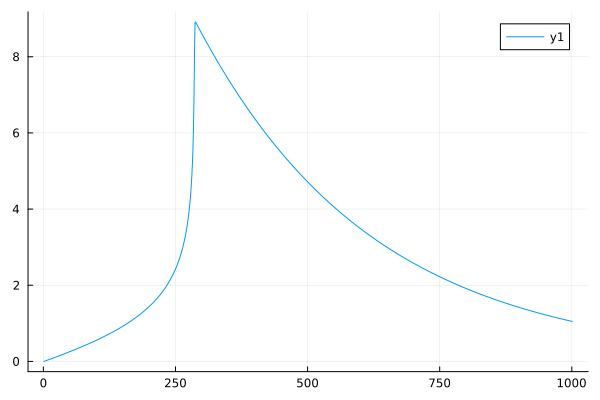

In [13]:
Plots.plot(x1[:,1])

---

In [14]:
using Roots, Printf

f(x,a) = exp(x) - a*x

for p = 2.8:-0.02:2.6
  try
    ff(x) = f(x,p) 
    @printf "%.2f : %.5f\n" p find_zero(ff,1.0)
  catch
    error("No convergence for parameter value: $p")
  end
end

# There is no solution for a <= exp(1) => 2.7182 .....

2.80 : 0.77594
2.78 : 0.80279
2.76 : 0.83547
2.74 : 0.87909
2.72 : 0.96487


LoadError: No convergence for parameter value: 2.7

---

## A Touch of Chaos

In [ ]:
using Plots,OrdinaryDiffEq, Sundials

function lorenz(du,u,p,t)
 du[1] = 10.0(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)
sol = solve(prob,CVODE_Adams())
Plots.plot(sol,vars=(1,2,3))

---

### The Differential Equation Framework

In [23]:
using DifferentialEquations

In [24]:
f(du,u,p,t) = (du .= u)
g(du,u,p,t) = (du .= u)

u0 = rand(4,2)

4×2 Matrix{Float64}:
 0.506385  0.678945
 0.927694  0.0125105
 0.646967  0.93581
 0.353392  0.778507

In [25]:
W = WienerProcess(0.0,0.0,0.0);

In [26]:
prob = SDEProblem(f,g,u0,(0.0,1.0),noise=W)
sol = solve(prob,SRIW1())

retcode: Success
Interpolation: 1st order linear
t: 74-element Vector{Float64}:
 0.0
 0.0003310702188372615
 0.0006661149304724827
 0.0010430402310621066
 0.0014670811942254333
 0.001944127277784176
 0.002480804121787762
 0.0030845655712917956
 0.0037637972019838335
 0.004527932786512376
 0.005387585319106987
 0.006354694418275924
 0.007442692154840978
 ⋮
 0.7736181111100285
 0.7974485255308135
 0.8209251399193597
 0.8473363311064742
 0.8727351439703176
 0.8908168781456465
 0.9111588290928915
 0.9340435239085421
 0.9518950861406609
 0.9719780936517946
 0.9945714771018199
 1.0
u: 74-element Vector{Matrix{Float64}}:
 [0.5063850177391532 0.6789452363689651; 0.927694026114709 0.012510533807145396; 0.6469674816314681 0.9358098375105456; 0.3533924438839755 0.7785074687583989]
 [0.5142109811540732 0.68943804400431; 0.942031139683012 0.012703878745178834; 0.6569660867728604 0.9502723774655727; 0.35885397264186175 0.7905389680234177]
 [0.5100610401499127 0.6838739325529748; 0.9344284750238626 0

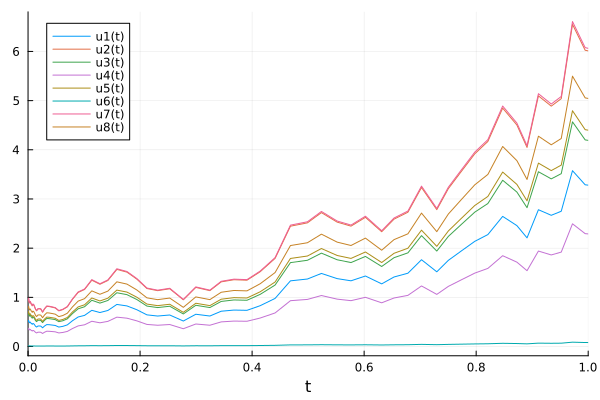

In [27]:
# using Plots
# gr()
Plots.plot(sol)

In [28]:
function f(du,u,p,t)
  du[1] = u[1]
end

prob = ODEProblem(f,[0.2],(0.0,10.0))

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 1-element Vector{Float64}:
 0.2

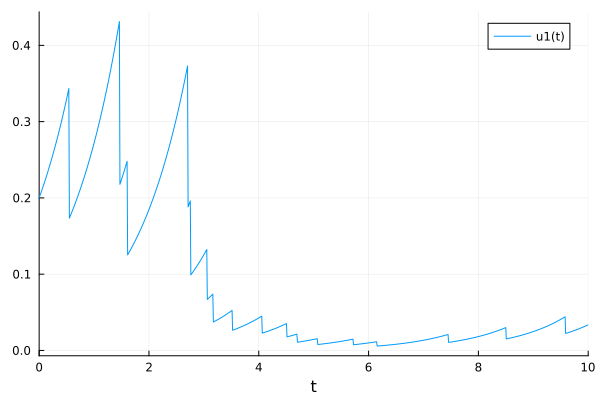

In [29]:
rate(u,p,t) = 2
affect!(integrator) = (integrator.u[1] = integrator.u[1]/2)
jump = ConstantRateJump(rate,affect!)
jump_prob = JumpProblem(prob,Direct(),jump)

sol = solve(jump_prob,Tsit5())
Plots.plot(sol)

---

## Calculus
### Differentiation

In [15]:
using Calculus

In [16]:
f(x)=sin(x)*cos(x)
derivative(f,1.0)

-0.41614683653632545

In [17]:
# Check since d(f) => cos*cos - sin*sin
cos(1.0)^2 - sin(1.0)^2

-0.4161468365471423

In [18]:
# Possible to curry the function
df = derivative(f)
df(1.0)

-0.41614683653632545

In [19]:
# Also defined is the 2nd derivative
d2f = second_derivative(f)
d2f(1.0)

-1.8185953905296441

In [20]:
# Also can use tick notation forhigher derivatives
# e.g. Value of the 3rd derivative
f'''(1.0)

LoadError: MethodError: no method matching adjoint(::typeof(f))

[0mClosest candidates are:
[0m  adjoint([91m::Union{LinearAlgebra.QR, LinearAlgebra.QRCompactWY, LinearAlgebra.QRPivoted}[39m)
[0m[90m   @[39m [36mLinearAlgebra[39m [90m/Applications/Julia-1.9.app/Contents/Resources/julia/share/julia/stdlib/v1.9/LinearAlgebra/src/[39m[90m[4mqr.jl:517[24m[39m
[0m  adjoint([91m::Union{LinearAlgebra.Cholesky, LinearAlgebra.CholeskyPivoted}[39m)
[0m[90m   @[39m [36mLinearAlgebra[39m [90m/Applications/Julia-1.9.app/Contents/Resources/julia/share/julia/stdlib/v1.9/LinearAlgebra/src/[39m[90m[4mcholesky.jl:556[24m[39m
[0m  adjoint([91m::Rotations.Rotation[39m)
[0m[90m   @[39m [32mRotations[39m [90m~/.julia/packages/Rotations/vUzHx/src/[39m[90m[4mcore_types.jl:12[24m[39m
[0m  ...


In [21]:
#
# There are 2D functions, argument is a N-vector
# Be careful of name clashes
#
h(x) = (1+x[1])*exp(x[1])*sin(x[2])*cos(x[2])
gd=Calculus.gradient(h)
gd([1.0,1.0])

2-element Vector{Float64}:
  3.7075900080760276
 -2.262408767426671

In [22]:
hs = Calculus.hessian(h)
hs([1.0,1.0])

2×2 Matrix{Float64}:
  4.94345  -3.39361
 -3.39361  -9.88691

### Prime Notation

In [23]:
f(x) = sin(x)*cos(x)

f (generic function with 2 methods)

In [24]:
f'(1.0)

LoadError: MethodError: no method matching adjoint(::typeof(f))

[0mClosest candidates are:
[0m  adjoint([91m::Union{LinearAlgebra.QR, LinearAlgebra.QRCompactWY, LinearAlgebra.QRPivoted}[39m)
[0m[90m   @[39m [36mLinearAlgebra[39m [90m/Applications/Julia-1.9.app/Contents/Resources/julia/share/julia/stdlib/v1.9/LinearAlgebra/src/[39m[90m[4mqr.jl:517[24m[39m
[0m  adjoint([91m::Union{LinearAlgebra.Cholesky, LinearAlgebra.CholeskyPivoted}[39m)
[0m[90m   @[39m [36mLinearAlgebra[39m [90m/Applications/Julia-1.9.app/Contents/Resources/julia/share/julia/stdlib/v1.9/LinearAlgebra/src/[39m[90m[4mcholesky.jl:556[24m[39m
[0m  adjoint([91m::Rotations.Rotation[39m)
[0m[90m   @[39m [32mRotations[39m [90m~/.julia/packages/Rotations/vUzHx/src/[39m[90m[4mcore_types.jl:12[24m[39m
[0m  ...


In [ ]:
# Check
cos(1.0)^2 - sin(1.0)^2

In [ ]:
f''(1.0)

In [ ]:
f'''(1.0)

In [ ]:
f''''(1.0)

### Symbolic differentiation

In [25]:
# It is possible to output the symbolic version of the derivate
differentiate("sin(x)*cos(x)", :x)

:((1 * cos(x)) * cos(x) + sin(x) * (1 * -(sin(x))))

In [26]:
# Not that clear but can be simplfied somewhat
# ... although not entirely perfect.
simplify(differentiate("sin(x)*cos(x)", :x)) 

:(cos(x) * cos(x) + sin(x) * -(sin(x)))

In [27]:
# These techniques work more than a single variable too
# We get a 2-D array of partial derivatives
# Clearly the terms with a '0' multiplier can be ignored
#
simplify(differentiate("x*exp(-x)*sin(y)", [:x, :y]))

2-element Vector{Any}:
 :(1 * exp(-x) * sin(y) + x * (-1 * exp(-x)) * sin(y) + x * exp(-x) * 0)
 :(0 * exp(-x) * sin(y) + x * 0 * sin(y) + x * exp(-x) * (1 * cos(y)))

---

### Automatic differentiation

In [28]:
struct D <: Number
  d1::Float64
  d2::Float64
end

import Base: +, /, convert, promote_rule
+(x::D, y::D) = D(x.d1+y.d1, x.d2+y.d2)
/(x::D, y::D) = D(x.d1/y.d1, (y.d1*x.d2 - x.d1*y.d2)/y.d1^2)
convert(::Type{D}, x::Real) = D(x,zero(x))
promote_rule(::Type{D}, ::Type{<:Number}) = D

da = D(17,1)

D(17.0, 1.0)

In [29]:
function hero(x; k::Integer = 10)
  @assert k > 0
  t = (1+x)/2
  for i = 2:k
    t = (t + x/t)/2
  end
  return t
end

# Call the function with the D() structure.
db = hero(da)

D(4.123105625617661, 0.12126781251816648)

In [30]:
db.d1^2   # Confirm the solution

17.0

In [31]:
# How does this work?
# Decode it without the 'dual' number

using Printf
function dhero(x; k = 10) 
    t  = (1+x)/2
    dt = 1
    @printf "%3d : %.5f : %.5f\n" 1 t dt
    for i = 2:k;  
        t  = (t+x/t)/2; 
        dt = (dt + (t - x*dt)/t^2)/2; 
        @printf "%3d : %.5f : %.5f\n" i t dt
    end    
    (t,dt)
end

dhero(17, k=5)

  1 : 9.00000 : 1.00000
  2 : 5.44444 : 0.30508
  3 : 4.28345 : 0.12793
  4 : 4.12611 : 0.12127
  5 : 4.12311 : 0.12127


(4.123106716962795, 0.12126781251943676)

---

### Forward Differences

In [4]:
using ForwardDiff

In [7]:
u = [1.1,2.2,3.3]
f(x::Vector) = sqrt(sum(x.*x));

f(u)

4.115823125451335

In [8]:
ForwardDiff.gradient(f, u)

3-element Vector{Float64}:
 0.26726124191242445
 0.5345224838248489
 0.8017837257372732

In [9]:
ForwardDiff.hessian(f, u)

3×3 Matrix{Float64}:
  0.22561    -0.0347093  -0.0520639
 -0.0347093   0.173546   -0.104128
 -0.0520639  -0.104128    0.0867731

In [10]:
function tensor(f, x)
  n = length(x)
  out = ForwardDiff.jacobian(y -> ForwardDiff.hessian(f, y), x)
  return reshape(out, n, n, n)
end

tensor(f, u)

3×3×3 Array{Float64, 3}:
[:, :, 1] =
 -0.04395    -0.0247923   -0.0371885
 -0.0247923  -0.00225385   0.0202846
 -0.0371885   0.0202846    0.01465

[:, :, 2] =
 -0.0247923   -0.00225385   0.0202846
 -0.00225385  -0.0676154   -0.00676154
  0.0202846   -0.00676154   0.0293

[:, :, 3] =
 -0.0371885   0.0202846    0.01465
  0.0202846  -0.00676154   0.0293
  0.01465     0.0293      -0.0507116

---

### Symbolic output using SymPy 

In [3]:
using SymPy

[ Info: Precompiling SymPy [24249f21-da20-56a4-8eb1-6a02cf4ae2e6]


In [34]:
# Display Hero's first 4 terms
# Gets a little complex after that, try upping M!

M = 4
x = symbols("x")
for i = 1:M
  display(simplify(hero(x, k = i )))
end

LoadError: UndefVarError: `heron` not defined

### Quadratures

In [35]:
using QuadGK
f(x) = sin(x)*(1.0 + cos(x))
quadgk(f,0.0,1.0)

(0.8137344032686459, 3.3306690738754696e-16)

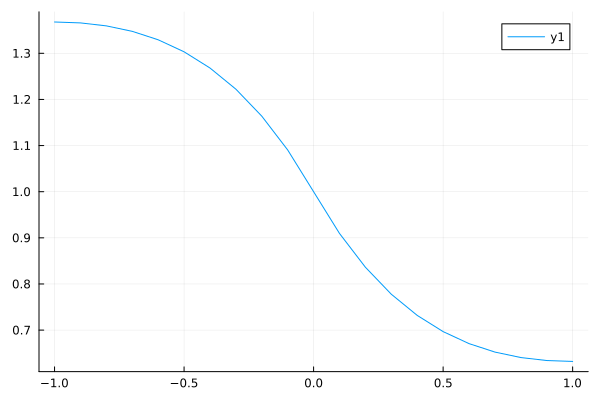

In [36]:
#=
Addition function gives points and weights over the interval [-1,1]
Pick a sigmodial function : 1 - x exp(-|x|)
=#
g(u) = 1 - u*exp(-abs(u))

using Plots
x = collect(-1.0:0.1:1.0)
y = g.(x)
Plots.plot(x,y)

In [37]:
# The gauss() function creates a tuple of N array of points and weights
(x,w) = gauss(20)
s = sum([w[i]*g(x[i]) for i = 1:20])

2.0000000000000004

In [38]:
# Alternate package which will do multidimension quadratutes
# Written by Steven Johnson (of PyCall, IJulia, etc. )
# It also does 1-D integration

using HCubature
hquadrature(f,0.0,1.0)

(0.813734403268646, 2.220446049250313e-16)

In [39]:
# But the power is the n-D quadratures
# Notice that the function expects an array argument

h(x) = 2.0*x[1]*exp(-x[1])*sin(x[2])*cos(x[2])
hcubature(h, [0,0], [1,1])

(0.18710211142604422, 2.5980184438782923e-9)

---

## Optimisation

In [ ]:
# Add JuMP#master to get v0.19

using JuMP, Clp

In [ ]:
#=
Maximize the 5x+3y function subject to the constraint that: 3x+5y < 7
=#
m = Model(with_optimizer(Clp.Optimizer))

@variable(m, 0 <= x <= 5 );
@variable(m, 0 <= y <= 10 );

@objective(m, Max, 5x + 3y );
@constraint(m, 2x + 5y <= 7.0 );

In [ ]:
JuMP.optimize!(m)

In [ ]:
println("x = ", JuMP.value(x), " y = ", JuMP.value(y))

In [ ]:
JuMP.objective_value(m)

### Knapsack problem

In [ ]:
using JuMP, LinearAlgebra, Printf

N = 6;
m = Model()
@variable(m, x[1:N], Bin);      # Define array variable to hold results
profit = [ 5, 3, 2, 7, 4, 4 ];  # Profit vector of size N
weight = [ 2, 8, 4, 2, 5, 6 ];  # Weights vector of size 

maxcap = 15;

@objective(m, Max, dot(profit, x));
@constraint(m, dot(weight, x) <= maxcap);


In [ ]:
using GLPK
JuMP.optimize!(m, with_optimizer(GLPK.Optimizer))

In [ ]:
println("Objective is : ", JuMP.objective_value(m))
println("\nSolution is :")

for i = 1:N
    print("\tx[$i] = ", JuMP.value(x[i]))
    println(", p[$i]/w[$i] = ", profit[i]/weight[i])
end

---

### Optim

In [ ]:
using Optim

In [ ]:
rosenbrock(x) =  (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
result = Optim.optimize(rosenbrock, zeros(2), BFGS())

In [ ]:
# Look at some values across a diagonal (x[1] == x[2]) cut
#
using Printf
for x in 0.0:0.1:1.5
  @printf "%3.1f : %f\n" x rosenbrock([x,x])
end

---

## Stochastic Simulations 

In [ ]:
using SimJulia, ResumableFunctions
using Distributions
using Printf, Random

In [ ]:
NUM_CUSTOMERS = 16     # total number of customers generated
NUM_TELLERS   = 2      # number of servers
QUEUE_MAX     = 2      # Maximum size of queue

μ = 0.4                # service rate
λ = 0.9                # arrival rate

arrival_dist = Exponential(1/λ)  # interarrival time distriubtion
service_dist = Exponential(1/μ)  # service time distribution

seed = ccall((:clock,"libc"),Int32,())
Random.seed!(seed);

In [ ]:
queue_length = 0;
queue_stack  = Array{Integer,1}(undef,0);

@resumable function visit(env::Environment, 
                        teller::Resource, 
                        id::Integer, 
                        time_arrvl::Float64, 
                        dist_serve::Distribution)

# customer arrives
# recall the crazy scoping rules, we can see the array but not the scalar
#
    global queue_length
    @yield timeout(env, time_arrvl)
    @printf "Customer %2d %15s : %.3f\n" id "arrives" now(env)
    if queue_length > 0
        push!(queue_stack,id)
        println("CHECK: Length of the queue is $queue_length")
    end
    queue_length += 1
# customer starts to be served
    @yield request(teller)
    queue_length -= 1
    @printf "Customer %2d %15s : %.3f\n" id "being served" now(env) 
#  teller is busy
    @yield timeout(env, rand(dist_serve)) 
# customer leaves
    @yield release(teller) 
    @printf "Customer %2d %15s : %.3f\n" id "leaves" now(env)
end

In [ ]:
# initialize simulation <: environment
sim     = Simulation()  

# initialize service resources
service = Resource(sim, NUM_TELLERS) 

# initialize customers and set arrival time
# customers arrive randomly baed on Poisson distribution
arrival_time = 0.0
for i = 1:NUM_CUSTOMERS 
    arrival_time += rand(arrival_dist)
    @process visit(sim, service, i, arrival_time, service_dist)
end

# run the simulation
run(sim)

In [ ]:
# Check on which customers had to wait
queue_stack

---

In [ ]:
qs = [9;10;11;13;14;15;16]
qs'